<a href="https://colab.research.google.com/github/Nayeem1028/Simulation-and-Modeling-Lab/blob/main/SIM_Lab_Assignment_05_2215151028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ID**: 2215151028

#**Instructions** :

### Dataset = [15, 17, 16, 14, 18, 20, 19, 15, 21, 22]

1. Load the Dataset: Use the provided dataset in your colab
2. Extract Temperature Scores: Extract the temperatures from the dataset for analysis.
3. Center and Scale the Data: Define the mean and standard deviation for a normal distribution and center and scale the temperature data accordingly.
4. Perform the K-S Test: Use MATLAB's kstest function to perform a one-sample K-S test on the scaled data.
5. Output the Results: Display the test decision (h), p-value, KS statistic
6. Plot the Empirical CDF: Generate a plot comparing the empirical CDF of the scaled temperature data with the standard normal CDF.
7. Write a Conclusion: Based on the results, write a short conclusion about whether the null hypothesis (that the temperatures come from a normal distribution) can be rejected.





In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm


In [3]:
# Load the Dataset
dataset = [15, 17, 16, 14, 18, 20, 19, 15, 21, 22]
#Extract Temperature Scores: Extract the temperatures from the dataset for analysis.
temperatures= np.array(dataset)



In [4]:
# Center and Scale the Data
mu = np.mean(temperatures)  # Sample mean
sigma = np.std(temperatures) # Sample standard deviation
#Center and Scale the Data
scaled_temperatures = (temperatures - mu) / sigma

In [5]:
# Perform the K-S Test
ks_statistic, p_value = stats.kstest(scaled_temperatures, 'norm')

K-S Statistic: 0.1496
P-value: 0.9550
Decision (h): 0


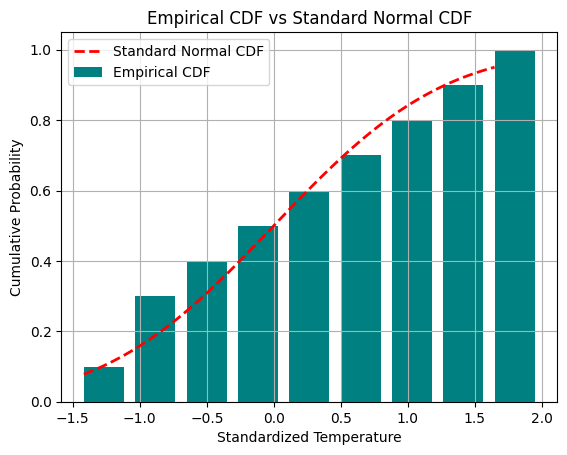

In [15]:
# Output the Results
alpha = 0.05 # significance level
h = 1 if p_value < alpha else 0 #Decision (1=reject null hypothesis, 0=fail to reject)


print(f"K-S Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision (h): {h}")

# Plot the Empirical CDF
plt.figure()

# Calculate and plot the Empirical CDF using bars
ecdf = np.sort(scaled_temperatures)
y = np.arange(1, len(ecdf) + 1) / len(ecdf)
plt.bar(ecdf, y, width=0.3, align='edge', color='teal', label='Empirical CDF')  # Bar-type visualization

# Plot the Standard Normal CDF
x = np.linspace(min(scaled_temperatures), max(scaled_temperatures), 100)
plt.plot(x, norm.cdf(x, 0, 1), 'r--', linewidth=2, label='Standard Normal CDF')

plt.legend()
plt.title('Empirical CDF vs Standard Normal CDF')
plt.xlabel('Standardized Temperature')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


## Conclusion

The one-sample Kolmogorov-Smirnov test was conducted to assess the normality of the daily temperature data. The resulting p-value of 0.9550, being significantly greater than the typical significance level of 0.05, indicates that we fail to reject the null hypothesis. Therefore, it is reasonable to assume that the daily temperature data does not significantly deviate from a normal distribution, at least for the sample considered.